## Test for Normality

- Automatically not normal since there is a categorical data type column (weathercode (wmo code))

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV and drop unnamed columns
df = pd.read_csv('Final Yield_Weather (Mindanao).csv')
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df

,Year,Location,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),...,soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Production (mt),Area (ha),Yield (mt/ha)
0,1990,AGUSAN DEL NORTE,6,4.1,25.15,78.36,20.88,975.30,0.16,0.75,...,0.28,140.02,70.89,1701.0,1,9.4,100,226.68,200.0,1.133400
1,1991,AGUSAN DEL NORTE,8,3.1,25.06,77.99,20.73,975.55,0.16,0.76,...,0.27,138.79,73.80,1634.2,1,11.5,100,231.68,204.0,1.135686
2,1992,AGUSAN DEL NORTE,8,3.1,25.39,74.29,20.11,975.90,0.17,0.92,...,0.21,144.62,73.53,1433.2,1,7.9,100,219.08,199.0,1.100905
3,1993,AGUSAN DEL NORTE,8,3.6,24.92,79.60,20.94,975.66,0.15,0.70,...,0.28,136.18,72.02,2017.8,1,8.3,100,231.47,203.0,1.140246
4,1994,AGUSAN DEL NORTE,6,3.6,24.96,79.45,20.96,975.32,0.15,0.70,...,0.29,137.68,71.24,1722.0,1,8.6,100,238.09,208.0,1.144663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2017,ZAMBOANGA SIBUGAY,7,4.0,25.65,87.04,23.24,987.28,0.14,0.45,...,0.48,118.82,78.74,3683.2,1,7.6,100,52.21,62.0,0.842097
745,2018,ZAMBOANGA SIBUGAY,7,4.0,25.80,86.33,23.25,987.30,0.15,0.48,...,0.47,139.32,74.60,2665.7,1,8.3,100,52.55,62.0,0.847581
746,2019,ZAMBOANGA SIBUGAY,7,4.0,25.98,84.28,22.96,988.14,0.16,0.57,...,0.43,145.57,73.78,2253.2,1,7.6,100,53.22,63.0,0.844762
747,2020,ZAMBOANGA SIBUGAY,7,2.5,26.09,84.89,23.20,987.71,0.15,0.55,...,0.44,135.13,74.15,3017.7,1,7.9,100,56.25,64.0,0.878906


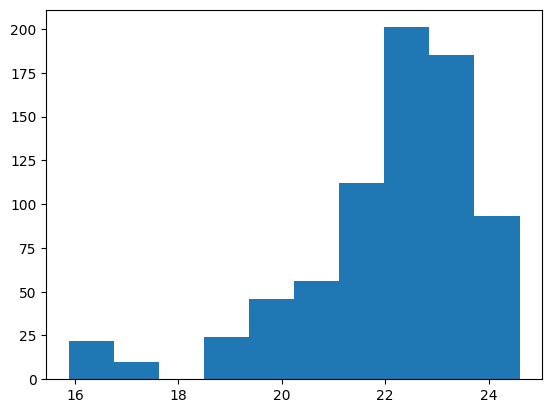

In [8]:
# Display histogram of a specific column
plt.hist(df['dewpoint_2m (°C)'])
plt.show()

In [9]:
df.columns

Index(['Year', 'Location', 'Wind_Direction', 'Wind_Speed_(km/h)',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'surface_pressure (hPa)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Production (mt)',
       'Area (ha)', 'Yield (mt/ha)'],
      dtype='object')

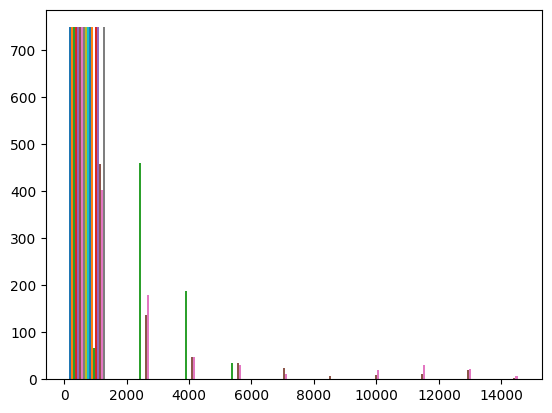

In [10]:
# Display histogram of a specific column
plt.hist(df.drop(columns=['Location', 'Year', 'weathercode (wmo code)']))
plt.show()

## Outlier Detection Using Z-score value

In [17]:
# Display datatypes
df.dtypes

Year                                   int64
Location                              object
Wind_Direction                         int64
Wind_Speed_(km/h)                    float64
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
surface_pressure (hPa)               float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
rain (mm)                            float64
weathercode (wmo code)                 int64
windgusts_10m (km/h)                 float64
cloudcover (%)                         int64
Production (mt)                      float64
Area (ha)                            float64
Yield (mt/ha)                        float64
dtype: object

In [18]:
# Fill missing NaN values
df['Yield (mt/ha)'] = df['Yield (mt/ha)'].fillna(0)

In [19]:
df['Yield (mt/ha)'].isnull().sum()

0

In [20]:
df.isnull().values.any()

False

In [21]:
df.describe()

,Year,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Production (mt),Area (ha),Yield (mt/ha)
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.00000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,2005.785047,5.407210,6.090254,24.995748,84.649132,22.093013,979.074917,0.152579,0.527858,26.071368,0.394853,140.722162,72.16743,2587.441578,7.818425,11.820561,99.623498,1996.345327,2533.560107,0.792341
std,9.167805,3.342483,4.098679,1.848888,2.503053,1.736459,28.753437,0.010365,0.113367,1.763617,0.063967,14.244135,3.11357,928.012749,17.063161,3.664927,5.141816,2896.577687,3336.732937,0.516563
min,1990.000000,0.000000,0.800000,18.937500,74.290000,15.880000,904.690000,0.127500,0.290000,20.767500,0.180000,104.160000,63.76000,695.100000,1.000000,6.500000,29.000000,2.770000,14.000000,0.020567
25%,1998.000000,3.000000,3.400000,24.310000,82.980000,21.292500,963.237500,0.146667,0.440000,25.240000,0.370000,130.240000,70.01000,1964.800000,1.000000,9.000000,100.000000,204.200000,310.000000,0.452222
50%,2006.000000,4.000000,4.100000,25.570000,84.980000,22.540000,983.530000,0.150000,0.517500,26.420000,0.400000,140.027500,72.00000,2456.900000,1.000000,11.200000,100.000000,834.520000,1183.000000,0.748461
75%,2014.000000,8.000000,8.000000,26.350000,86.490000,23.305000,1005.940000,0.160000,0.600000,27.435000,0.445000,150.380000,74.50000,3106.100000,1.000000,13.700000,100.000000,2517.200000,2907.000000,1.004191
max,2021.000000,13.000000,24.900000,27.650000,90.190000,24.600000,1010.540000,0.180000,0.950000,29.270000,0.490000,181.480000,80.54000,5840.300000,51.000000,24.500000,100.000000,14373.880000,14727.000000,3.033851


### Production (mt)

In [22]:
# Getting an overview of the data
df['Production (mt)'].describe()

count      749.000000
mean      1996.345327
std       2896.577687
min          2.770000
25%        204.200000
50%        834.520000
75%       2517.200000
max      14373.880000
Name: Production (mt), dtype: float64

In [23]:
# Print the outliers, mean and standard deviation in the Production (mt)
mean = np.mean(df['Production (mt)'])
std = np.std(df['Production (mt)'])
 
threshold = 3
outliers = []
for x in df['Production (mt)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
        
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  1996.3453271028036

Standard deviation:  2894.6434115379866

Outliers  :  [11117.13, 13159.67, 14373.88, 13462.18, 13056.48, 11386.97, 10703.48, 11718.27, 11999.41, 11997.91, 11850.15, 12723.66, 12888.9, 12570.29, 12085.42, 11796.03, 10706.38, 11113.98, 11660.93, 11907.61, 12213.84, 12462.98, 12199.23, 12506.3, 13224.63, 12709.82, 12207.25, 11984.85, 10875.79, 10785.45, 11512.57]


In [24]:
# Handle and cap the outliers in the Production(mt) column by setting upper and lower limits
upper_limit = df['Production (mt)'].mean() + 3*df['Production (mt)'].std()
lower_limit = df['Production (mt)'].mean() - 3*df['Production (mt)'].std()

df['Production (mt)'] = np.where(
    df['Production (mt)']>upper_limit,
    upper_limit,
    np.where(
        df['Production (mt)']<lower_limit,
        lower_limit,
        df['Production (mt)']
    )
)

In [25]:
df['Production (mt)'].describe()

count      749.000000
mean      1938.010200
std       2694.222724
min          2.770000
25%        204.200000
50%        834.520000
75%       2517.200000
max      10686.078389
Name: Production (mt), dtype: float64

### Area (ha)

In [26]:
# Getting an overview of the data
df['Area (ha)'].describe()

count      749.000000
mean      2533.560107
std       3336.732937
min         14.000000
25%        310.000000
50%       1183.000000
75%       2907.000000
max      14727.000000
Name: Area (ha), dtype: float64

In [27]:
# Print the outliers, mean and standard deviation in the Area(ha)
mean = np.mean(df['Area (ha)'])
std = np.std(df['Area (ha)'])
 
threshold = 3
outliers = []
for x in df['Area (ha)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  2533.5601068090787

Standard deviation:  3334.5047339649964

Outliers  :  [12752.0, 12752.0, 12720.0, 12715.0, 13025.0, 13225.0, 13300.0, 13300.0, 13370.0, 13370.0, 14707.0, 14727.0]


In [28]:
# Handle and cap the outliers in the Area(ha) column by setting upper and lower limits
upper_limit = df['Area (ha)'].mean() + 3*df['Area (ha)'].std()
lower_limit = df['Area (ha)'].mean() - 3*df['Area (ha)'].std()

df['Area (ha)'] = np.where(
    df['Area (ha)']>upper_limit,
    upper_limit,
    np.where(
        df['Area (ha)']<lower_limit,
        lower_limit,
        df['Area (ha)']
    )
)

In [29]:
df['Area (ha)'].describe()

count      749.000000
mean      2520.959449
std       3296.044674
min         14.000000
25%        310.000000
50%       1183.000000
75%       2907.000000
max      12543.758916
Name: Area (ha), dtype: float64

### Yield (mt/ha)

In [30]:
# Getting an overview of the data
df['Yield (mt/ha)'].describe()

count    749.000000
mean       0.792341
std        0.516563
min        0.020567
25%        0.452222
50%        0.748461
75%        1.004191
max        3.033851
Name: Yield (mt/ha), dtype: float64

In [31]:
# Print the outliers, mean and standard deviation in the Yield(mt/ha)
mean = np.mean(df['Yield (mt/ha)'])
std = np.std(df['Yield (mt/ha)'])
 
threshold = 3
outliers = []
for x in df['Yield (mt/ha)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.7923407644379172

Standard deviation:  0.5162183135023595

Outliers  :  [3.033851186, 2.61067217, 2.598941176, 2.460055556, 2.51127844, 2.410487013, 2.496985222, 2.416433498, 2.401410382, 2.408364349, 2.414779628, 2.496699314, 2.526956522, 2.417729469, 2.467971014, 2.568461538, 2.468413462, 2.482941176, 2.402097561, 2.432436647, 2.389044834, 2.414038835, 2.446258503, 2.433734239, 2.411309408, 2.418846899]


In [32]:
# Handle and cap the outliers in the Yield(mt/ha) column by setting upper and lower limits
upper_limit = df['Yield (mt/ha)'].mean() + 3*df['Yield (mt/ha)'].std()
lower_limit = df['Yield (mt/ha)'].mean() - 3*df['Yield (mt/ha)'].std()

df['Yield (mt/ha)'] = np.where(
    df['Yield (mt/ha)']>upper_limit,
    upper_limit,
    np.where(
        df['Yield (mt/ha)']<lower_limit,
        lower_limit,
        df['Yield (mt/ha)']
    )
)

In [33]:
df['Yield (mt/ha)'].describe()

count    749.000000
mean       0.787471
std        0.500467
min        0.020567
25%        0.452222
50%        0.748461
75%        1.004191
max        2.342031
Name: Yield (mt/ha), dtype: float64

In [34]:
df.isnull().sum()

Year                                 0
Location                             0
Wind_Direction                       0
Wind_Speed_(km/h)                    0
temperature_2m (°C)                  0
relativehumidity_2m (%)              0
dewpoint_2m (°C)                     0
surface_pressure (hPa)               0
et0_fao_evapotranspiration (mm)      0
vapor_pressure_deficit (kPa)         0
soil_temperature_28_to_100cm (°C)    0
soil_moisture_28_to_100cm (m³/m³)    0
direct_radiation (W/m²)              0
diffuse_radiation (W/m²)             0
rain (mm)                            0
weathercode (wmo code)               0
windgusts_10m (km/h)                 0
cloudcover (%)                       0
Production (mt)                      0
Area (ha)                            0
Yield (mt/ha)                        0
dtype: int64

### weathercode (wmo code)

### temperature_2m (°C)

In [35]:
# Getting an overview of the data
df['temperature_2m (°C)'].describe()

count    749.000000
mean      24.995748
std        1.848888
min       18.937500
25%       24.310000
50%       25.570000
75%       26.350000
max       27.650000
Name: temperature_2m (°C), dtype: float64

In [37]:
# Print the outliers, mean and standard deviation in the temperature_2m (°C)
mean = np.mean(df['temperature_2m (°C)'])
std = np.std(df['temperature_2m (°C)'])
 
threshold = 3
outliers = []
for x in df['temperature_2m (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  24.995747663551406

Standard deviation:  1.8476534162772151

Outliers  :  [18.9375, 18.9925, 19.0225, 19.3225, 19.0125, 19.03, 19.29, 19.025, 19.155, 19.1625, 19.4125, 19.1575, 19.26, 19.415, 19.3025, 19.2175, 19.445]


In [38]:
# Handle and cap the outliers in the relativehumidity_2m (%) column by setting upper and lower limits
upper_limit = df['temperature_2m (°C)'].mean() + 3*df['temperature_2m (°C)'].std()
lower_limit = df['temperature_2m (°C)'].mean() - 3*df['temperature_2m (°C)'].std()

df['temperature_2m (°C)'] = np.where(
    df['temperature_2m (°C)']>upper_limit,
    upper_limit,
    np.where(
        df['temperature_2m (°C)']<lower_limit,
        lower_limit,
        df['temperature_2m (°C)']
    )
)

In [39]:
df['temperature_2m (°C)'].describe()

count    749.000000
mean      25.001722
std        1.830258
min       19.449083
25%       24.310000
50%       25.570000
75%       26.350000
max       27.650000
Name: temperature_2m (°C), dtype: float64

### relativehumidity_2m (%)

In [40]:
# Getting an overview of the data
df['relativehumidity_2m (%)'].describe()

count    749.000000
mean      84.649132
std        2.503053
min       74.290000
25%       82.980000
50%       84.980000
75%       86.490000
max       90.190000
Name: relativehumidity_2m (%), dtype: float64

In [41]:
# Print the outliers, mean and standard deviation in the relativehumidity_2m (%)
mean = np.mean(df['relativehumidity_2m (%)'])
std = np.std(df['relativehumidity_2m (%)'])
 
threshold = 3
outliers = []
for x in df['relativehumidity_2m (%)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  84.64913217623497

Standard deviation:  2.5013814766557623

Outliers  :  [74.29, 75.04, 77.08, 75.36, 76.51]


In [42]:
# Handle and cap the outliers in the relativehumidity_2m (%) column by setting upper and lower limits
upper_limit = df['relativehumidity_2m (%)'].mean() + 3*df['relativehumidity_2m (%)'].std()
lower_limit = df['relativehumidity_2m (%)'].mean() - 3*df['relativehumidity_2m (%)'].std()

df['relativehumidity_2m (%)'] = np.where(
    df['relativehumidity_2m (%)']>upper_limit,
    upper_limit,
    np.where(
        df['relativehumidity_2m (%)']<lower_limit,
        lower_limit,
        df['relativehumidity_2m (%)']
    )
)

In [43]:
df['relativehumidity_2m (%)'].describe()

count    749.000000
mean      84.659039
std        2.468739
min       77.139973
25%       82.980000
50%       84.980000
75%       86.490000
max       90.190000
Name: relativehumidity_2m (%), dtype: float64

### dewpoint_2m (°C)

In [44]:
# Getting an overview of the data
df['dewpoint_2m (°C)'].describe()

count    749.000000
mean      22.093013
std        1.736459
min       15.880000
25%       21.292500
50%       22.540000
75%       23.305000
max       24.600000
Name: dewpoint_2m (°C), dtype: float64

In [45]:
# Print the outliers, mean and standard deviation in the dewpoint_2m (°C)
mean = np.mean(df['dewpoint_2m (°C)'])
std = np.std(df['dewpoint_2m (°C)'])
 
threshold = 3
outliers = []
for x in df['dewpoint_2m (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  22.093012906097016

Standard deviation:  1.7352997395925898

Outliers  :  [16.52, 16.345, 15.88, 16.15, 16.1375, 16.37, 16.36, 16.0725, 16.8525, 16.6175, 16.395, 16.7525, 16.4975, 16.3625, 16.3275, 16.62, 16.8375, 16.505, 16.580000000000002, 16.490000000000002, 16.7775, 16.7575, 16.6275, 16.4825, 16.4075, 16.8825, 16.7225, 16.377499999999998]


In [46]:
# Handle and cap the outliers in the relativehumidity_2m (%) column by setting upper and lower limits
upper_limit = df['dewpoint_2m (°C)'].mean() + 3*df['dewpoint_2m (°C)'].std()
lower_limit = df['dewpoint_2m (°C)'].mean() - 3*df['dewpoint_2m (°C)'].std()

df['dewpoint_2m (°C)'] = np.where(
    df['dewpoint_2m (°C)']>upper_limit,
    upper_limit,
    np.where(
        df['dewpoint_2m (°C)']<lower_limit,
        lower_limit,
        df['dewpoint_2m (°C)']
    )
)

In [47]:
df['dewpoint_2m (°C)'].describe()

count    749.000000
mean      22.107745
std        1.689187
min       16.883635
25%       21.292500
50%       22.540000
75%       23.305000
max       24.600000
Name: dewpoint_2m (°C), dtype: float64

### rain (mm)

In [48]:
# Getting an overview of the data
df['rain (mm)'].describe()

count     749.000000
mean     2587.441578
std       928.012749
min       695.100000
25%      1964.800000
50%      2456.900000
75%      3106.100000
max      5840.300000
Name: rain (mm), dtype: float64

In [49]:
# Print the outliers, mean and standard deviation in the rain(mm)
mean = np.mean(df['rain (mm)'])
std = np.std(df['rain (mm)'])
 
threshold = 3
outliers = []
for x in df['rain (mm)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  2587.441577659101

Standard deviation:  927.3930407899217

Outliers  :  [5391.5, 5674.8, 5374.6, 5840.3, 5444.4]


In [50]:
# Handle and cap the outliers in the rain(mm) column by setting upper and lower limits
upper_limit = df['rain (mm)'].mean() + 3*df['rain (mm)'].std()
lower_limit = df['rain (mm)'].mean() - 3*df['rain (mm)'].std()

df['rain (mm)'] = np.where(
    df['rain (mm)']>upper_limit,
    upper_limit,
    np.where(
        df['rain (mm)']<lower_limit,
        lower_limit,
        df['rain (mm)']
    )
)

In [51]:
df['rain (mm)'].describe()

count     749.000000
mean     2586.282431
std       924.293770
min       695.100000
25%      1964.800000
50%      2456.900000
75%      3106.100000
max      5371.479824
Name: rain (mm), dtype: float64

### surface_pressure (hPa)

In [52]:
# Getting an overview of the data
df['surface_pressure (hPa)'].describe()

count     749.000000
mean      979.074917
std        28.753437
min       904.690000
25%       963.237500
50%       983.530000
75%      1005.940000
max      1010.540000
Name: surface_pressure (hPa), dtype: float64

In [53]:
# Print the outliers, mean and standard deviation in the surface_pressure (hPa)
mean = np.mean(df['surface_pressure (hPa)'])
std = np.std(df['surface_pressure (hPa)'])
 
threshold = 3
outliers = []
for x in df['surface_pressure (hPa)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  979.0749165554073

Standard deviation:  28.734235854124066

Outliers  :  []


### cloudcover (%)

In [54]:
# Getting an overview of the data
df['cloudcover (%)'].describe()

count    749.000000
mean      99.623498
std        5.141816
min       29.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: cloudcover (%), dtype: float64

In [55]:
# Print the outliers, mean and standard deviation in the cloudcover (%)
mean = np.mean(df['cloudcover (%)'])
std = np.std(df['cloudcover (%)'])
 
threshold = 3
outliers = []
for x in df['cloudcover (%)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  99.62349799732978

Standard deviation:  5.138382288592487

Outliers  :  [30, 29, 29, 30]


In [56]:
# Handle and cap the outliers in the rain(mm) column by setting upper and lower limits
upper_limit = df['cloudcover (%)'].mean() + 3*df['cloudcover (%)'].std()
lower_limit = df['cloudcover (%)'].mean() - 3*df['cloudcover (%)'].std()

df['cloudcover (%)'] = np.where(
    df['cloudcover (%)']>upper_limit,
    upper_limit,
    np.where(
        df['cloudcover (%)']<lower_limit,
        lower_limit,
        df['cloudcover (%)']
    )
)

In [57]:
df['cloudcover (%)'].describe()

count    749.000000
mean      99.915610
std        1.152463
min       84.198050
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: cloudcover (%), dtype: float64

### et0_fao_evapotranspiration (mm)

In [58]:
# Getting an overview of the data
df['et0_fao_evapotranspiration (mm)'].describe()

count    749.000000
mean       0.152579
std        0.010365
min        0.127500
25%        0.146667
50%        0.150000
75%        0.160000
max        0.180000
Name: et0_fao_evapotranspiration (mm), dtype: float64

In [59]:
# Print the outliers, mean and standard deviation in the et0_fao_evapotranspiration (mm
mean = np.mean(df['et0_fao_evapotranspiration (mm)'])
std = np.std(df['et0_fao_evapotranspiration (mm)'])
 
threshold = 3
outliers = []
for x in df['et0_fao_evapotranspiration (mm)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.1525789942145082

Standard deviation:  0.010357711210168175

Outliers  :  []


### vapor_pressure_deficit (kPa)

In [62]:
# Getting an overview of the data
df['vapor_pressure_deficit (kPa)'].describe()

count    749.000000
mean       0.527858
std        0.113367
min        0.290000
25%        0.440000
50%        0.517500
75%        0.600000
max        0.950000
Name: vapor_pressure_deficit (kPa), dtype: float64

In [63]:
# Print the outliers, mean and standard deviation in the vapor_pressure_deficit (kPa)
mean = np.mean(df['vapor_pressure_deficit (kPa)'])
std = np.std(df['vapor_pressure_deficit (kPa)'])
 
threshold = 3
outliers = []
for x in df['vapor_pressure_deficit (kPa)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.5278582554517133

Standard deviation:  0.11329097962042783

Outliers  :  [0.92, 0.91, 0.95, 0.92, 0.87]


In [64]:
# Handle and cap the outliers in the vapor_pressure_deficit (kPa) column by setting upper and lower limits
upper_limit = df['vapor_pressure_deficit (kPa)'].mean() + 3*df['vapor_pressure_deficit (kPa)'].std()
lower_limit = df['vapor_pressure_deficit (kPa)'].mean() - 3*df['vapor_pressure_deficit (kPa)'].std()

df['vapor_pressure_deficit (kPa)'] = np.where(
    df['vapor_pressure_deficit (kPa)']>upper_limit,
    upper_limit,
    np.where(
        df['vapor_pressure_deficit (kPa)']<lower_limit,
        lower_limit,
        df['vapor_pressure_deficit (kPa)']
    )
)

In [65]:
df['vapor_pressure_deficit (kPa)'].describe()

count    749.000000
mean       0.527551
std        0.112356
min        0.290000
25%        0.440000
50%        0.517500
75%        0.600000
max        0.867958
Name: vapor_pressure_deficit (kPa), dtype: float64

### windspeed_10m (km/h)

In [66]:
df.columns

Index(['Year', 'Location', 'Wind_Direction', 'Wind_Speed_(km/h)',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'surface_pressure (hPa)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Production (mt)',
       'Area (ha)', 'Yield (mt/ha)'],
      dtype='object')

In [67]:
# Getting an overview of the data
df['Wind_Speed_(km/h)'].describe()

count    749.000000
mean       6.090254
std        4.098679
min        0.800000
25%        3.400000
50%        4.100000
75%        8.000000
max       24.900000
Name: Wind_Speed_(km/h), dtype: float64

In [68]:
# Print the outliers, mean and standard deviation in the windspeed_10m (km/h)
mean = np.mean(df['Wind_Speed_(km/h)'])
std = np.std(df['Wind_Speed_(km/h)'])
 
threshold = 3
outliers = []
for x in df['Wind_Speed_(km/h)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  6.090253671562083

Standard deviation:  4.095941990571078

Outliers  :  [21.7, 23.5, 24.9, 18.4, 19.5, 20.2]


In [69]:
# Handle and cap the outliers in the windspeed_10m (km/h) column by setting upper and lower limits
upper_limit = df['Wind_Speed_(km/h)'].mean() + 3*df['Wind_Speed_(km/h)'].std()
lower_limit = df['Wind_Speed_(km/h)'].mean() - 3*df['Wind_Speed_(km/h)'].std()

df['Wind_Speed_(km/h)'] = np.where(
    df['Wind_Speed_(km/h)']>upper_limit,
    upper_limit,
    np.where(
        df['Wind_Speed_(km/h)']<lower_limit,
        lower_limit,
        df['Wind_Speed_(km/h)']
    )
)

In [71]:
df['Wind_Speed_(km/h)'].describe()

count    749.000000
mean       6.066379
std        4.012264
min        0.800000
25%        3.400000
50%        4.100000
75%        8.000000
max       18.386291
Name: Wind_Speed_(km/h), dtype: float64

### winddirection_10m (°)

In [72]:
df.columns

Index(['Year', 'Location', 'Wind_Direction', 'Wind_Speed_(km/h)',
       'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'surface_pressure (hPa)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Production (mt)',
       'Area (ha)', 'Yield (mt/ha)'],
      dtype='object')

In [73]:
# Getting an overview of the data
df['Wind_Direction'].describe()

count    749.000000
mean       5.407210
std        3.342483
min        0.000000
25%        3.000000
50%        4.000000
75%        8.000000
max       13.000000
Name: Wind_Direction, dtype: float64

In [74]:
# Print the outliers, mean and standard deviation in the winddirection_10m (°)
mean = np.mean(df['Wind_Direction'])
std = np.std(df['Wind_Direction'])
 
threshold = 3
outliers = []
for x in df['Wind_Direction']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  5.4072096128170895

Standard deviation:  3.340251157400254

Outliers  :  []


### windgusts_10m (km/h)

In [75]:
# Getting an overview of the data
df['windgusts_10m (km/h)'].describe()

count    749.000000
mean      11.820561
std        3.664927
min        6.500000
25%        9.000000
50%       11.200000
75%       13.700000
max       24.500000
Name: windgusts_10m (km/h), dtype: float64

In [76]:
# Print the outliers, mean and standard deviation in the windgusts_10m (km/h)
mean = np.mean(df['windgusts_10m (km/h)'])
std = np.std(df['windgusts_10m (km/h)'])
 
threshold = 3
outliers = []
for x in df['windgusts_10m (km/h)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  11.82056074766355

Standard deviation:  3.6624795099580365

Outliers  :  [23.8, 23.8, 24.1, 24.1, 24.5]


In [77]:
# Handle and cap the outliers in the windgusts_10m (km/h) column by setting upper and lower limits
upper_limit = df['windgusts_10m (km/h)'].mean() + 3*df['windgusts_10m (km/h)'].std()
lower_limit = df['windgusts_10m (km/h)'].mean() - 3*df['windgusts_10m (km/h)'].std()

df['windgusts_10m (km/h)'] = np.where(
    df['windgusts_10m (km/h)']>upper_limit,
    upper_limit,
    np.where(
        df['windgusts_10m (km/h)']<lower_limit,
        lower_limit,
        df['windgusts_10m (km/h)']
    )
)

In [78]:
df['windgusts_10m (km/h)'].describe()

count    749.000000
mean      11.812252
std        3.638388
min        6.500000
25%        9.000000
50%       11.200000
75%       13.700000
max       22.815341
Name: windgusts_10m (km/h), dtype: float64

### soil_temperature_28_to_100cm (°C)

In [79]:
# Getting an overview of the data
df['soil_temperature_28_to_100cm (°C)'].describe()

count    749.000000
mean      26.071368
std        1.763617
min       20.767500
25%       25.240000
50%       26.420000
75%       27.435000
max       29.270000
Name: soil_temperature_28_to_100cm (°C), dtype: float64

In [80]:
# Print the outliers, mean and standard deviation in the soil_temperature_28_to_100cm (°C)
mean = np.mean(df['soil_temperature_28_to_100cm (°C)'])
std = np.std(df['soil_temperature_28_to_100cm (°C)'])
 
threshold = 3
outliers = []
for x in df['soil_temperature_28_to_100cm (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  26.071368491321763

Standard deviation:  1.7624388233615955

Outliers  :  [20.7675]


In [81]:
# Handle and cap the outliers in the windgusts_10m (km/h) column by setting upper and lower limits
upper_limit = df['soil_temperature_28_to_100cm (°C)'].mean() + 3*df['soil_temperature_28_to_100cm (°C)'].std()
lower_limit = df['soil_temperature_28_to_100cm (°C)'].mean() - 3*df['soil_temperature_28_to_100cm (°C)'].std()

df['soil_temperature_28_to_100cm (°C)'] = np.where(
    df['soil_temperature_28_to_100cm (°C)']>upper_limit,
    upper_limit,
    np.where(
        df['soil_temperature_28_to_100cm (°C)']<lower_limit,
        lower_limit,
        df['soil_temperature_28_to_100cm (°C)']
    )
)

In [82]:
df['soil_temperature_28_to_100cm (°C)'].describe()

count    749.000000
mean      26.071386
std        1.763564
min       20.780519
25%       25.240000
50%       26.420000
75%       27.435000
max       29.270000
Name: soil_temperature_28_to_100cm (°C), dtype: float64

### soil_moisture_28_to_100cm (m³/m³)

In [83]:
# Getting an overview of the data
df['soil_moisture_28_to_100cm (m³/m³)'].describe()

count    749.000000
mean       0.394853
std        0.063967
min        0.180000
25%        0.370000
50%        0.400000
75%        0.445000
max        0.490000
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

In [84]:
# Print the outliers, mean and standard deviation in the soil_moisture_28_to_100cm (m³/m³)
mean = np.mean(df['soil_moisture_28_to_100cm (m³/m³)'])
std = np.std(df['soil_moisture_28_to_100cm (m³/m³)'])
 
threshold = 3
outliers = []
for x in df['soil_moisture_28_to_100cm (m³/m³)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.39485313751668893

Standard deviation:  0.06392465978158889

Outliers  :  [0.2, 0.18, 0.18, 0.2, 0.2]


In [85]:
# Handle and cap the outliers in the soil_moisture_28_to_100cm (m³/m³) column by setting upper and lower limits
upper_limit = df['soil_moisture_28_to_100cm (m³/m³)'].mean() + 3*df['soil_moisture_28_to_100cm (m³/m³)'].std()
lower_limit = df['soil_moisture_28_to_100cm (m³/m³)'].mean() - 3*df['soil_moisture_28_to_100cm (m³/m³)'].std()

df['soil_moisture_28_to_100cm (m³/m³)'] = np.where(
    df['soil_moisture_28_to_100cm (m³/m³)']>upper_limit,
    upper_limit,
    np.where(
        df['soil_moisture_28_to_100cm (m³/m³)']<lower_limit,
        lower_limit,
        df['soil_moisture_28_to_100cm (m³/m³)']
    )
)

In [86]:
df['soil_moisture_28_to_100cm (m³/m³)'].describe()

count    749.000000
mean       0.394926
std        0.063736
min        0.202951
25%        0.370000
50%        0.400000
75%        0.445000
max        0.490000
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

### direct_radiation (W/m²)

In [87]:
# Getting an overview of the data
df['direct_radiation (W/m²)'].describe()

count    749.000000
mean     140.722162
std       14.244135
min      104.160000
25%      130.240000
50%      140.027500
75%      150.380000
max      181.480000
Name: direct_radiation (W/m²), dtype: float64

In [88]:
# Print the outliers, mean and standard deviation in the direct_radiation (W/m²)
mean = np.mean(df['direct_radiation (W/m²)'])
std = np.std(df['direct_radiation (W/m²)'])
 
threshold = 3
outliers = []
for x in df['direct_radiation (W/m²)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  140.72216177125057

Standard deviation:  14.234623076035364

Outliers  :  []


### diffuse_radiation (W/m²)

In [90]:
# Getting an overview of the data
df['diffuse_radiation (W/m²)'].describe()

count    749.00000
mean      72.16743
std        3.11357
min       63.76000
25%       70.01000
50%       72.00000
75%       74.50000
max       80.54000
Name: diffuse_radiation (W/m²), dtype: float64

In [91]:
# Print the outliers, mean and standard deviation in the diffuse_radiation (W/m²)
mean = np.mean(df['diffuse_radiation (W/m²)'])
std = np.std(df['diffuse_radiation (W/m²)'])
 
threshold = 3
outliers = []
for x in df['diffuse_radiation (W/m²)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  72.16742990654205

Standard deviation:  3.111490590421

Outliers  :  []


In [93]:
# Export DataFrame to a CSV
df.to_csv('Without_Outliers2.csv')

## Correlation Matrix

In [13]:
# load the dataset
df1 = pd.read_csv('Without_Outliers2.csv')
df1.head(3)

,Unnamed: 0,Year,Location,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),...,soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Production (mt),Area (ha),Yield (mt/ha)
0,0,1990,AGUSAN DEL NORTE,6,4.1,25.15,78.360000,20.88,975.30,0.16,...,0.28,140.02,70.89,1701.0,1,9.4,100.0,226.68,200.0,1.133400
1,1,1991,AGUSAN DEL NORTE,8,3.1,25.06,77.990000,20.73,975.55,0.16,...,0.27,138.79,73.80,1634.2,1,11.5,100.0,231.68,204.0,1.135686
2,2,1992,AGUSAN DEL NORTE,8,3.1,25.39,77.139973,20.11,975.90,0.17,...,0.21,144.62,73.53,1433.2,1,7.9,100.0,219.08,199.0,1.100905


In [14]:
df1 = df1.drop(columns=['Unnamed: 0', 'Location', 'Year', 'Production (mt)', 'Area (ha)'])

In [109]:
df1.columns

Index(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'surface_pressure (hPa)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Yield (mt/ha)'],
      dtype='object')

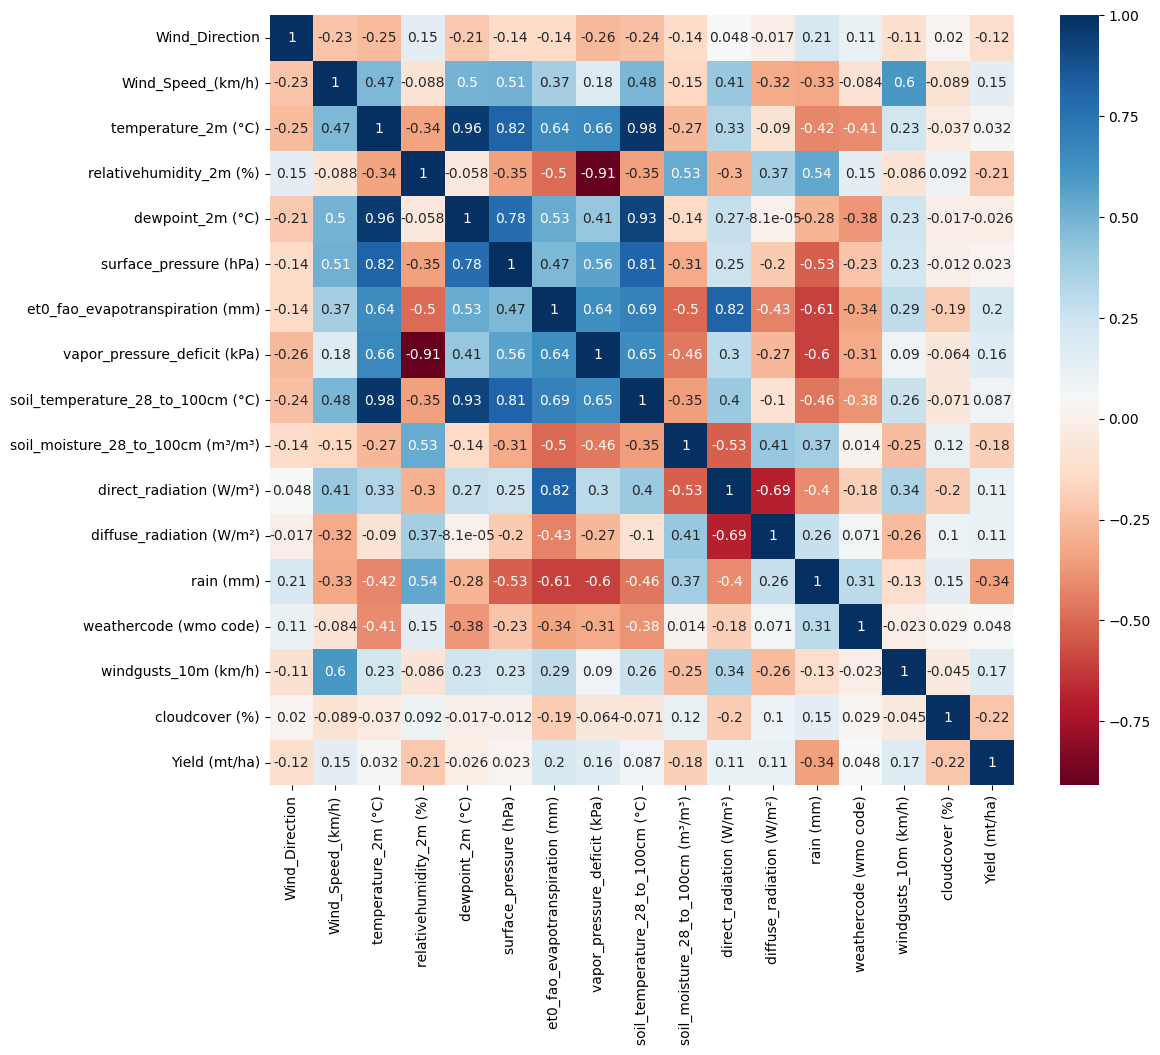

In [110]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

In [111]:
# name of the label (can be seen in the dataframe)
label = 'Yield (mt/ha)'

# list with feature names
features = df1.columns.tolist()
features.remove(label)

In [112]:
from scipy.stats import pearsonr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-yield correlation
    rcf_all = []
    for feature in subset:
        coeff = pearsonr( df1[label], df1[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df1[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [113]:
df1

,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Yield (mt/ha)
0,6,4.1,25.15,78.360000,20.88,975.30,0.16,0.750000,26.01,0.28,140.02,70.89,1701.0,1,9.4,100.0,1.133400
1,8,3.1,25.06,77.990000,20.73,975.55,0.16,0.760000,25.89,0.27,138.79,73.80,1634.2,1,11.5,100.0,1.135686
2,8,3.1,25.39,77.139973,20.11,975.90,0.17,0.867958,26.90,0.21,144.62,73.53,1433.2,1,7.9,100.0,1.100905
3,8,3.6,24.92,79.600000,20.94,975.66,0.15,0.700000,25.73,0.28,136.18,72.02,2017.8,1,8.3,100.0,1.140246
4,6,3.6,24.96,79.450000,20.96,975.32,0.15,0.700000,25.74,0.29,137.68,71.24,1722.0,1,8.6,100.0,1.144663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,7,4.0,25.65,87.040000,23.24,987.28,0.14,0.450000,26.61,0.48,118.82,78.74,3683.2,1,7.6,100.0,0.842097
745,7,4.0,25.80,86.330000,23.25,987.30,0.15,0.480000,26.74,0.47,139.32,74.60,2665.7,1,8.3,100.0,0.847581
746,7,4.0,25.98,84.280000,22.96,988.14,0.16,0.570000,27.02,0.43,145.57,73.78,2253.2,1,7.6,100.0,0.844762
747,7,2.5,26.09,84.890000,23.20,987.71,0.15,0.550000,27.21,0.44,135.13,74.15,3017.7,1,7.9,100.0,0.878906


In [114]:
corr_matrix = df1.corr()
corr_matrix

,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Yield (mt/ha)
Wind_Direction,1.000000,-0.226550,-0.254274,0.146044,-0.213016,-0.137263,-0.144806,-0.262252,-0.239028,-0.136447,0.048221,-0.017412,0.208833,0.109852,-0.106043,0.019901,-0.123926
Wind_Speed_(km/h),-0.226550,1.000000,0.473473,-0.087838,0.498058,0.506771,0.372766,0.177839,0.479665,-0.153983,0.408775,-0.318915,-0.326613,-0.084445,0.599927,-0.088790,0.147879
temperature_2m (°C),-0.254274,0.473473,1.000000,-0.340192,0.956731,0.816322,0.642682,0.659194,0.976732,-0.273402,0.331214,-0.089961,-0.419855,-0.407411,0.227954,-0.036788,0.032010
relativehumidity_2m (%),0.146044,-0.087838,-0.340192,1.000000,-0.058328,-0.348250,-0.495290,-0.908854,-0.346804,0.528051,-0.296691,0.368553,0.539441,0.149548,-0.085777,0.091821,-0.213822
dewpoint_2m (°C),-0.213016,0.498058,0.956731,-0.058328,1.000000,0.777117,0.528045,0.414064,0.931384,-0.143832,0.273884,-0.000081,-0.281573,-0.376752,0.234850,-0.016701,-0.025894
surface_pressure (hPa),-0.137263,0.506771,0.816322,-0.348250,0.777117,1.000000,0.471262,0.559804,0.811640,-0.313046,0.251295,-0.200846,-0.525343,-0.229939,0.225904,-0.012470,0.023186
et0_fao_evapotranspiration (mm),-0.144806,0.372766,0.642682,-0.495290,0.528045,0.471262,1.000000,0.639985,0.691513,-0.503270,0.816397,-0.428098,-0.606702,-0.336739,0.285742,-0.193986,0.202436
vapor_pressure_deficit (kPa),-0.262252,0.177839,0.659194,-0.908854,0.414064,0.559804,0.639985,1.000000,0.649037,-0.460379,0.304288,-0.273269,-0.604817,-0.312849,0.089946,-0.063595,0.157755
soil_temperature_28_to_100cm (°C),-0.239028,0.479665,0.976732,-0.346804,0.931384,0.811640,0.691513,0.649037,1.000000,-0.354531,0.399653,-0.103297,-0.461491,-0.381006,0.257418,-0.071454,0.087238
soil_moisture_28_to_100cm (m³/m³),-0.136447,-0.153983,-0.273402,0.528051,-0.143832,-0.313046,-0.503270,-0.460379,-0.354531,1.000000,-0.525083,0.407430,0.374778,0.013889,-0.251282,0.117833,-0.184083


## Variance Inflation Factor

In [116]:
df1.columns

Index(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'surface_pressure (hPa)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Yield (mt/ha)'],
      dtype='object')

In [119]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']

In [121]:
# Calculate VIF using the features in x
def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Vif value : ', a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)
    
selected_features = cal_vif(x)
selected_features.head()


Iteration no  1
[5.13124441403392, 9.835762597934973, 208543.4455198298, 12266.107552316462, 123681.373706296, 5093.66765803467, 2823.931750647674, 3401.281388367932, 7618.304547817325, 93.0106610653396, 1182.7145127707345, 1936.1854773650389, 25.97257360814693, 1.7553610112623044, 20.28065503577063, 8157.6613666591875]
Vif value :  2
Iteration no  2
[5.103038033679513, 9.274950210086654, 11970.807739367407, 3866.447870026218, 5083.237279217993, 2752.8741859882216, 437.3277665245965, 7466.472606428884, 92.03800579486014, 1078.5423976706245, 1764.6315564387326, 23.451004183469145, 1.7548921246669673, 20.254486172863725, 8087.02464269852]
Vif value :  2
Iteration no  3
[4.947975131364829, 8.995656098111793, 3840.7870304959224, 4252.458234585701, 2598.786068307817, 137.92079440785204, 7464.9218709486795, 85.05958431847111, 1074.332124201582, 1570.1763597720064, 22.635519141760398, 1.737617502306985, 20.212642962708326, 4439.840456416014]
Vif value :  6
Iteration no  4
[4.876066118143886, 

,Wind_Direction,Wind_Speed_(km/h),rain (mm),weathercode (wmo code)
0,6,4.1,1701.0,1
1,8,3.1,1634.2,1
2,8,3.1,1433.2,1
3,8,3.6,2017.8,1
4,6,3.6,1722.0,1


In [123]:
# Creating a new DataFrame with the selected subset of columns
vif = df1.loc[:, ['Wind_Direction', 'Wind_Speed_(km/h)', 'rain (mm)', 'weathercode (wmo code)','Yield (mt/ha)']]
vif

,Wind_Direction,Wind_Speed_(km/h),rain (mm),weathercode (wmo code),Yield (mt/ha)
0,6,4.1,1701.0,1,1.133400
1,8,3.1,1634.2,1,1.135686
2,8,3.1,1433.2,1,1.100905
3,8,3.6,2017.8,1,1.140246
4,6,3.6,1722.0,1,1.144663
...,...,...,...,...,...
744,7,4.0,3683.2,1,0.842097
745,7,4.0,2665.7,1,0.847581
746,7,4.0,2253.2,1,0.844762
747,7,2.5,3017.7,1,0.878906


In [124]:
vif.to_csv('VIF2.csv')

## Random Forest Variable Importance

In [34]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [35]:
# Split dataset into training and testing sets
X = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [36]:
# Initialize a RFR with 100 decision trees
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
# Measure how much a feature contributes to the model
rf.feature_importances_

array([2.67379292e-02, 5.10527605e-02, 4.51573958e-02, 5.73477276e-02,
       7.34742287e-02, 1.91378777e-01, 7.90699987e-03, 3.05583902e-02,
       4.34840072e-02, 3.54819447e-02, 5.31246258e-02, 5.39737385e-02,
       2.67400773e-01, 8.23652577e-03, 5.46820568e-02, 2.11928396e-06])

Text(0.5, 0, 'Random Forest Feature Importance')

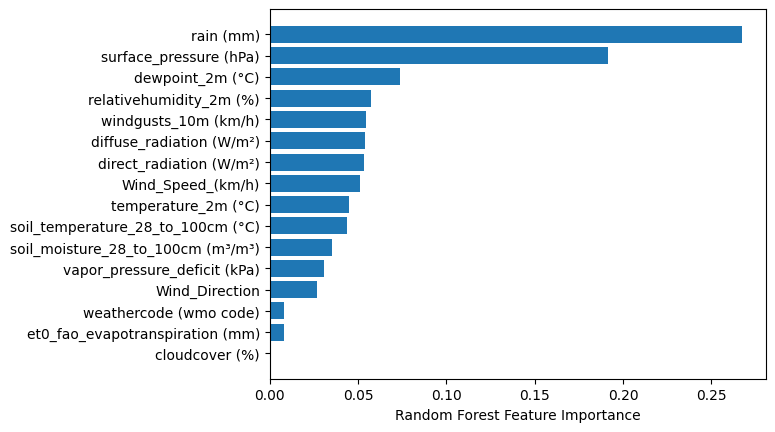

In [38]:
# Visualize the feature importances
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df1.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [43]:
df1.columns

Index(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'surface_pressure (hPa)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Yield (mt/ha)'],
      dtype='object')

In [44]:
# Create new DataFrame to be used for modeling
randomForest = df1.loc[:, ['rain (mm)', 'surface_pressure (hPa)', 'dewpoint_2m (°C)', 'relativehumidity_2m (%)','Yield (mt/ha)']]
randomForest

,rain (mm),surface_pressure (hPa),dewpoint_2m (°C),relativehumidity_2m (%),Yield (mt/ha)
0,1701.0,975.30,20.88,78.360000,1.133400
1,1634.2,975.55,20.73,77.990000,1.135686
2,1433.2,975.90,20.11,77.139973,1.100905
3,2017.8,975.66,20.94,79.600000,1.140246
4,1722.0,975.32,20.96,79.450000,1.144663
...,...,...,...,...,...
744,3683.2,987.28,23.24,87.040000,0.842097
745,2665.7,987.30,23.25,86.330000,0.847581
746,2253.2,988.14,22.96,84.280000,0.844762
747,3017.7,987.71,23.20,84.890000,0.878906


In [45]:
randomForest.to_csv('RandomForest2.csv')

## Sequential Feature Selection

In [46]:
# Importing libraries for Sequential Feature Selction
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB

In [47]:
# Splitting dataset into training and testing sets
X = df1.iloc[:, 1:]
y = df1.iloc[:, 0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [48]:
# Selecting top four features 
selector = SequentialFeatureSelector(GaussianNB() ,n_features_to_select=4, direction='forward', scoring="roc_auc", cv=5)

selector.fit_transform(X_train,y_train)

C:\Users\Angel\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Angel\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Angel\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Angel\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Angel\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:

array([[ 4.   , 24.6  , 81.83 , 20.94 ],
       [ 3.1  , 22.9  , 86.52 , 20.37 ],
       [ 2.3  , 25.68 , 88.3  , 23.45 ],
       ...,
       [10.9  , 26.2  , 81.38 , 22.72 ],
       [ 3.4  , 24.63 , 88.185, 22.38 ],
       [13.   , 26.35 , 86.905, 23.94 ]])

In [49]:
selector

SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select=4,
                          scoring='roc_auc')

In [50]:
# Extracting the names of the selected features
feature_names = np.array(df1.drop('Yield (mt/ha)',axis=1).columns.tolist())
feature_names[selector.get_support()]

array(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)'], dtype='<U33')

In [51]:
# Create new DataFrame to be used for modeling
SFF = df1.loc[:, ['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)', 'relativehumidity_2m (%)','Yield (mt/ha)']]
SFF

,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),Yield (mt/ha)
0,6,4.1,25.15,78.360000,1.133400
1,8,3.1,25.06,77.990000,1.135686
2,8,3.1,25.39,77.139973,1.100905
3,8,3.6,24.92,79.600000,1.140246
4,6,3.6,24.96,79.450000,1.144663
...,...,...,...,...,...
744,7,4.0,25.65,87.040000,0.842097
745,7,4.0,25.80,86.330000,0.847581
746,7,4.0,25.98,84.280000,0.844762
747,7,2.5,26.09,84.890000,0.878906


In [52]:
SFF.to_csv('SFF2.csv')